In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:

def process_csv_files_and_plot(folder_path):
    # Get list of all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Initialize lists to store cosine similarity and transcription times for both no_pause and with_pause files
    no_pause_cosine = []
    no_pause_time = []
    with_pause_cosine = []
    with_pause_time = []

    # Loop over each file
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)  # Load the CSV file
        
        # Depending on the filename, classify it as either 'no_pause' or 'with_pause'
        if 'no_pause' in csv_file:
            no_pause_cosine.extend(df['Cosine Similarity'].tolist())
            no_pause_time.extend(df['Transcription Time'].tolist())
        elif 'with_pause' in csv_file:
            with_pause_cosine.extend(df['Cosine Similarity'].tolist())
            with_pause_time.extend(df['Transcription Time'].tolist())

    # Calculate averages for both categories
    no_pause_cosine_avg = sum(no_pause_cosine) / len(no_pause_cosine) if no_pause_cosine else 0
    no_pause_time_avg = sum(no_pause_time) / len(no_pause_time) if no_pause_time else 0
    with_pause_cosine_avg = sum(with_pause_cosine) / len(with_pause_cosine) if with_pause_cosine else 0
    with_pause_time_avg = sum(with_pause_time) / len(with_pause_time) if with_pause_time else 0

    # Calculate combined averages (no_pause + with_pause)
    combined_cosine_avg = (no_pause_cosine_avg + with_pause_cosine_avg) / 2
    combined_time_avg = (no_pause_time_avg + with_pause_time_avg) / 2

    # Print the results
    print("No Pause Results:")
    print(f"Average Cosine Similarity: {no_pause_cosine_avg:.4f}")
    print(f"Average Transcription Time: {no_pause_time_avg:.4f} seconds")

    print("\nWith Pause Results:")
    print(f"Average Cosine Similarity: {with_pause_cosine_avg:.4f}")
    print(f"Average Transcription Time: {with_pause_time_avg:.4f} seconds")

    print("\nCombined Results:")
    print(f"Average Cosine Similarity: {combined_cosine_avg:.4f}")
    print(f"Average Transcription Time: {combined_time_avg:.4f} seconds")

    # Create separate bar charts for Cosine Similarity and Transcription Time with combined results

    # Cosine Similarity
    plt.figure(figsize=(8, 5))
    labels = ['No Pause', 'With Pause', 'Combined']
    cosine_values = [no_pause_cosine_avg, with_pause_cosine_avg, combined_cosine_avg]

    plt.bar(labels, cosine_values, color=['blue', 'orange', 'green'])
    plt.title('Average Cosine Similarity')
    plt.ylabel('Cosine Similarity')
    plt.xlabel('Condition')
    plt.ylim(0, 1)  # Set y-axis limit for better comparison
    plt.show()

    # Transcription Time
    plt.figure(figsize=(8, 5))
    time_values = [no_pause_time_avg, with_pause_time_avg, combined_time_avg]

    plt.bar(labels, time_values, color=['blue', 'orange', 'green'])
    plt.title('Average Transcription Time')
    plt.ylabel('Transcription Time (seconds)')
    plt.xlabel('Condition')
    plt.show()

No Pause Results:
Average Cosine Similarity: 0.9414
Average Transcription Time: 1.1393 seconds

With Pause Results:
Average Cosine Similarity: 0.8631
Average Transcription Time: 1.2883 seconds

Combined Results:
Average Cosine Similarity: 0.9022
Average Transcription Time: 1.2138 seconds


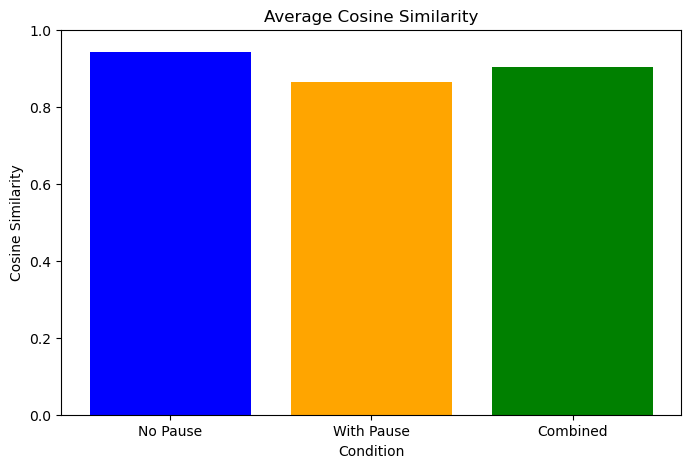

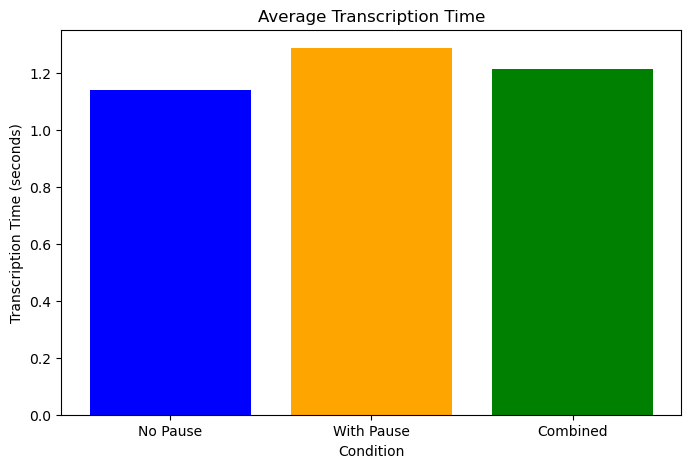

In [3]:
# Example usage
folder_path = "processed"  # Change this to your folder path containing the CSVs
process_csv_files_and_plot(folder_path)

In [4]:
def detect_hallucinations_by_file(folder_path):
    # Get list of all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Initialize a dictionary to store hallucinated files and their corresponding CSV files
    hallucination_files = []

    # Loop over each file
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)  # Load the CSV file

        # Check for hallucinations (Cosine Similarity < 0.2)
        hallucinations = df[df['Cosine Similarity'] < 0.2]

        if not hallucinations.empty:
            for _, row in hallucinations.iterrows():
                # Store the hallucinated file and the corresponding CSV file
                hallucination_files.append((row['File'], csv_file))

    # Print the results
    print("\n🌟 Hallucinated Files 🌟")
    
    if hallucination_files:
        for hallucinated_file, csv_file in hallucination_files:
            print(f"- Hallucinated File: {hallucinated_file} (Found in: {csv_file})")
    else:
        print("None!")

    return hallucination_files

In [5]:
# Example usage:
folder_path = "processed"
detect_hallucinations_by_file(folder_path)



🌟 Hallucinated Files 🌟
- Hallucinated File: 20_words_sample_with_pause_4.wav (Found in: Madelyn_Noise_with_pause.csv)


[('20_words_sample_with_pause_4.wav', 'Madelyn_Noise_with_pause.csv')]